# Signals
---


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## "Continous" time signals

In [11]:
# Time vector for continuous signal
t = np.linspace(0, 1, 1000)  # time from 0 to 1 second, 1000 samples
print(t)

# Generating a continuous-time sine wave signal
f1 = 5  # frequency in Hz
f2 = 10  # frequency in Hz
f3 = 7 # frequency in Hz

x_cont1 = np.sin(2 * np.pi * f1 * t)
x_cont2 = 0.25 * (2 * np.pi * f2 * t)
x_cont3 = 0.5 * np.sin(2 * np.pi * f3 * t)
x_cont4 = np.sinc(16*t)

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08608609 0.08708709 0.08808809 0.0890

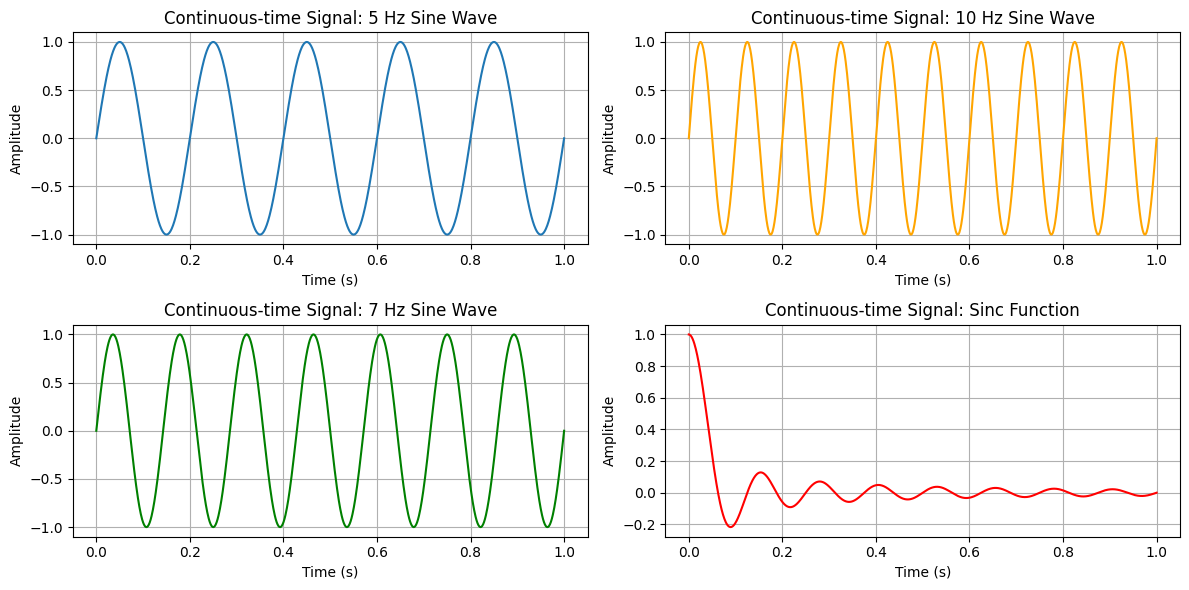

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t, x_cont1, label='5 Hz Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Continuous-time Signal: 5 Hz Sine Wave')

plt.subplot(2, 2, 2)
plt.plot(t, x_cont2, label='10 Hz Sine Wave', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Continuous-time Signal: 10 Hz Sine Wave')

plt.subplot(2, 2, 3)
plt.plot(t, x_cont3, label='7 Hz Sine Wave', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Continuous-time Signal: 7 Hz Sine Wave')

plt.subplot(2, 2, 4)
plt.plot(t, x_cont4, label='Sinc Function', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Continuous-time Signal: Sinc Function')
plt.tight_layout()




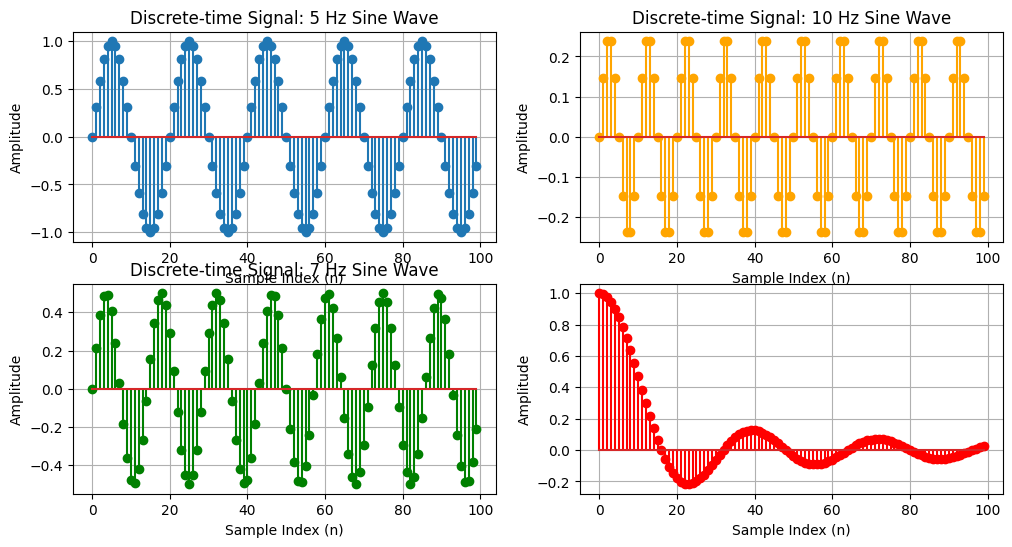

In [21]:
# Discrete-time signal generation
n = np.arange(0, 100)  # discrete time indices
x_disc1 = np.sin(2 * np.pi * f1 * n / 100)  # 5 Hz discrete signal
x_disc2 = 0.25 * np.sin(2 * np.pi * f2 * n / 100)  # 10 Hz discrete signal
x_disc3 = 0.5 * np.sin(2 * np.pi * f3 * n / 100)  # 7 Hz discrete signal
x_disc4 = np.sinc(n / 16)  # Sinc function in discrete time

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.stem(n, x_disc1, label='5 Hz Discrete Signal')
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Discrete-time Signal: 5 Hz Sine Wave')
plt.subplot(2, 2, 2)
plt.stem(n, x_disc2, label='10 Hz Discrete Signal', linefmt='orange')
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Discrete-time Signal: 10 Hz Sine Wave')
plt.subplot(2, 2, 3)
plt.stem(n, x_disc3, label='7 Hz Discrete Signal', linefmt='green')
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Discrete-time Signal: 7 Hz Sine Wave')
plt.subplot(2, 2, 4)
plt.stem(n, x_disc4, label='Sinc Function', linefmt='red')
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude')
plt.grid()

### FFT

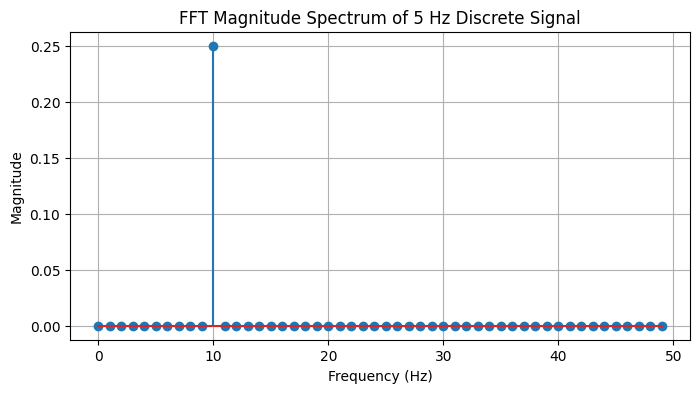

In [25]:
# Perform FFT on the 5 Hz discrete signal (x_disc1)
N = len(x_disc2)
X_fft = np.fft.fft(x_disc2) * (2 / N)  # Normalize the FFT
freqs = np.fft.fftfreq(N, d=1/100)  # Assuming 100 samples per second

# Only plot the positive frequencies
half_N = N // 2
plt.figure(figsize=(8, 4))
plt.stem(freqs[:half_N], np.abs(X_fft)[:half_N])
plt.title('FFT Magnitude Spectrum of 5 Hz Discrete Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

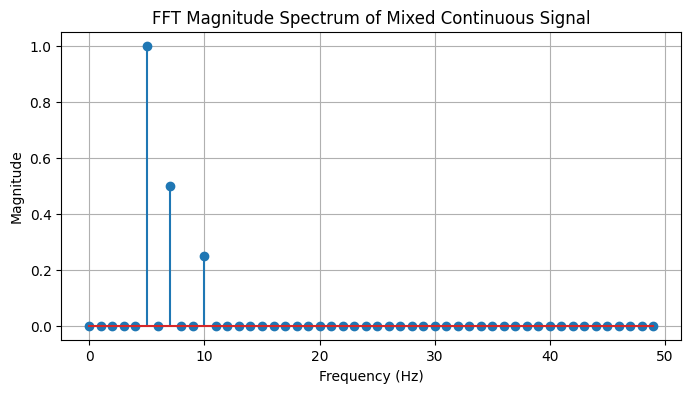

In [27]:
mixed_signal = x_disc1 + x_disc2 + x_disc3

mixed_signal_FFT = np.fft.fft(mixed_signal) * (2 / len(mixed_signal))
mixed_freqs = np.fft.fftfreq(len(mixed_signal), d=1/100)  # Assuming 100 samples per second

plt.figure(figsize=(8, 4))
plt.stem(mixed_freqs[:half_N], np.abs(mixed_signal_FFT)[:half_N])
plt.title('FFT Magnitude Spectrum of Mixed Continuous Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

## Signal library
---

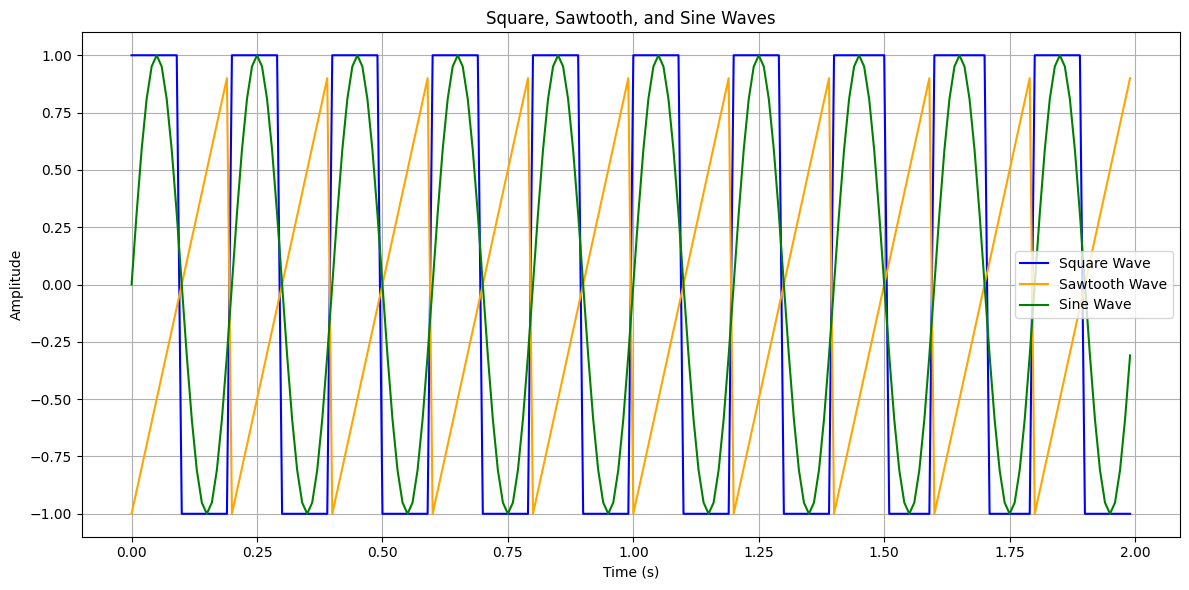

In [2]:
from scipy import signal

f, A, phi = 5, 1, 0  # Example parameters for square wave

fs = 100  # sampling rate (Hz)
T = 1/fs
N = 200   # number of samples
n = np.arange(N)
t = n * T  # time vector

square = A * signal.square(2 * np.pi * f * t + phi)
saw = A * signal.sawtooth(2 * np.pi * f * t + phi)
sine = A * np.sin(2 * np.pi * f * t + phi)

plt.figure(figsize=(12, 6))
plt.plot(t, square, label='Square Wave', color='blue')
plt.plot(t, saw, label='Sawtooth Wave', color='orange') 
plt.plot(t, sine, label='Sine Wave', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Square, Sawtooth, and Sine Waves')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


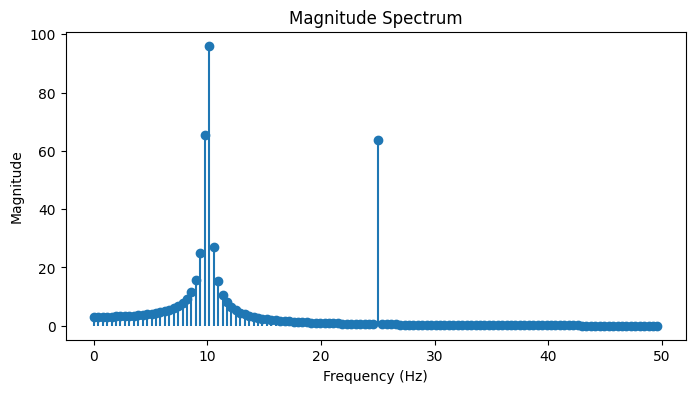

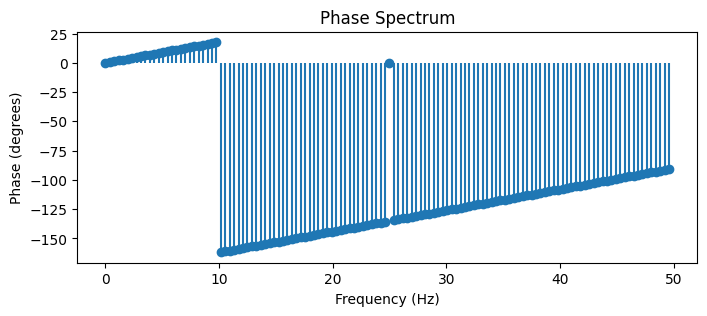

In [7]:
fs = 100          # sampling rate
T = 1/fs
N = 256           # FFT length (zero-pad if needed)
n = np.arange(N)

# 10 Hz sine + 25 Hz cosine
x = np.sin(2*np.pi*10*n*T) + 0.5*np.cos(2*np.pi*25*n*T)

X = np.fft.fft(x, n=N)
freqs = np.fft.fftfreq(N, T)

plt.figure(figsize=(8,4))
plt.stem(freqs[:N//2], np.abs(X)[:N//2], basefmt=" ")
plt.xlabel('Frequency (Hz)'); plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum'); plt.show()

# Cell 3: Phase spectrum (unwrap for clarity)
phase = np.angle(X)
plt.figure(figsize=(8,3))
plt.stem(freqs[:N//2], 180*np.unwrap(phase)[:N//2]/np.pi, basefmt=" ")
plt.xlabel('Frequency (Hz)'); plt.ylabel('Phase (degrees)')
plt.title('Phase Spectrum'); plt.show()
